In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import biutils 

from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.model_selection import StratifiedGroupKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate, cross_val_score



## Feature selection


About order:

 https://stats.stackexchange.com/questions/264533/how-should-feature-selection-and-hyperparameter-optimization-be-ordered-in-the-m 

Implementing StratifiedGroupKFold + recursive feature selection (with a minimum feature # of 5)

we are using the datasets from the previous notebooks, feel free to modify it to something else with similar format.

model

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
glf_opt = GradientBoostingClassifier(n_estimators = 50 ,learning_rate=0.5, max_depth=10,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           random_state=42)

In [17]:
# retrieve table from database
binary = biutils.get_tbl('binary')
no_out = biutils.get_tbl('bino_out')
zdata = biutils.get_tbl("bizdata")

data

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

variable

In [18]:
varsmwu = ['methylfat(FMETD10) ratioFAT54_1d',
 'methylenefat(FAT14) ratioFAT54_1d',
 'methylenefat(FAT21) ratioFAT54_1d',
 'methylenefat(FAT23) ratioFAT54_1d',
 'methylenefat(FAT29) ratioFAT54_1d',
 'fat39(fat39) ratioFAT54_1d',
 'methyleneglycerolbackbone(MGB42) ratioFAT54_1d',
 'olefinicfat(UFD54) ratioFAT54_1d',
 'unsatfatrightcrossp(UFRlower) ratioFAT54_1d',
 'unsatfatleftcrossp(UFLlower) ratioFAT54_1d',
 'unsatfatrightcrossp(UFRupper) ratioFAT54_1d',
 'unsatfatleftcrossp(UFLupper) ratioFAT54_1d',
 'triglycerylfatcrossp(TGFRlower) ratioFAT54_1d',
 'triglycerylfatcrossp(TGFRupper) ratioFAT54_1d',
 'fat(0p9_1p32) ratioFAT54_1d',
 'fat(1p32_0p9) ratioFAT54_1d',
 'fat(1p64_2p36) ratioFAT54_1d',
 'fat(2p36_1p64) ratioFAT54_1d',
 'fat(1p32_2p06) ratioFAT54_1d',
 'fat(2p06_1p32) ratioFAT54_1d',
 'fat(3p9_4p3) ratioFAT54_1d',
 'fat(4p2_3p9) ratioFAT54_1d',
 'methylfat(FMETD10) FAT14ratio',
 'methylenefat(FAT21) FAT14ratio',
 'methylenefat(FAT23) FAT14ratio',
 'methylenefat(FAT29) FAT14ratio',
 'tcholine(CHO32) FAT14ratio',
 'fat39(fat39) FAT14ratio',
 'methyleneglycerolbackbone(MGB42) FAT14ratio',
 'olefinicfat(UFD54) FAT14ratio',
 'unsatfatrightcrossp(UFRlower) FAT14ratio',
 'unsatfatleftcrossp(UFLupper) FAT14ratio',
 'triglycerylfatcrossp(TGFRupper) FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'fat(1p64_2p36) FAT14ratio',
 'fat(1p32_2p06) FAT14ratio',
 'fat(2p06_1p32) FAT14ratio',
 'fat(4p2_3p9) FAT14ratio',
 'gly+myo FAT14ratio',
 'methylfat(FMETD10) ratioFAT14_1d',
 'methylenefat(FAT14) ratioFAT14_1d',
 'methylenefat(FAT21) ratioFAT14_1d',
 'methylenefat(FAT23) ratioFAT14_1d',
 'methylenefat(FAT29) ratioFAT14_1d',
 'fat39(fat39) ratioFAT14_1d',
 'methyleneglycerolbackbone(MGB42) ratioFAT14_1d',
 'olefinicfat(UFD54) ratioFAT14_1d',
 'unsatfatrightcrossp(UFRlower) ratioFAT14_1d',
 'unsatfatleftcrossp(UFLlower) ratioFAT14_1d',
 'unsatfatrightcrossp(UFRupper) ratioFAT14_1d',
 'unsatfatleftcrossp(UFLupper) ratioFAT14_1d',
 'triglycerylfatcrossp(TGFRlower) ratioFAT14_1d',
 'triglycerylfatcrossp(TGFRupper) ratioFAT14_1d',
 'fat(0p9_1p32) ratioFAT14_1d',
 'fat(1p32_0p9) ratioFAT14_1d',
 'fat(1p64_2p36) ratioFAT14_1d',
 'fat(2p36_1p64) ratioFAT14_1d',
 'fat(1p32_2p06) ratioFAT14_1d',
 'fat(2p06_1p32) ratioFAT14_1d',
 'fat(3p9_4p3) ratioFAT14_1d',
 'fat(4p2_3p9) ratioFAT14_1d',
 'methylfat(FMETD10) ratioWAT47_1d',
 'methylenefat(FAT14) ratioWAT47_1d',
 'methylenefat(FAT21) ratioWAT47_1d',
 'methylenefat(FAT23) ratioWAT47_1d',
 'methylenefat(FAT29) ratioWAT47_1d',
 'tcholine(CHO32) ratioWAT47_1d',
 'methyleneglycerolbackbone(MGB42) ratioWAT47_1d',
 'olefinicfat(UFD54) ratioWAT47_1d',
 'unsatfatrightcrossp(UFRlower) ratioWAT47_1d',
 'unsatfatleftcrossp(UFLlower) ratioWAT47_1d',
 'unsatfatrightcrossp(UFRupper) ratioWAT47_1d',
 'unsatfatleftcrossp(UFLupper) ratioWAT47_1d',
 'triglycerylfatcrossp(TGFRlower) ratioWAT47_1d',
 'triglycerylfatcrossp(TGFRupper) ratioWAT47_1d',
 'fat(0p9_1p32) ratioWAT47_1d',
 'fat(1p32_0p9) ratioWAT47_1d',
 'fat(1p64_2p36) ratioWAT47_1d',
 'fat(2p36_1p64) ratioWAT47_1d',
 'fat(1p32_2p06) ratioWAT47_1d',
 'fat(2p06_1p32) ratioWAT47_1d',
 'fat(3p9_4p3) ratioWAT47_1d',
 'gly+myo ratioWAT47_1d',
 'nws_ffrac',
 'nws_wfratio',
 'nws_wfrac',
 'adc']

In [9]:

intervars =['triglycerylfatcrossp(TGFRupper) FAT14ratio', 
'methylfat(FMETD10) FAT14ratio', 
'olefinicfat(UFD54) FAT14ratio', 
'fat(4p2_3p9) FAT14ratio', 
'methylenefat(FAT21) FAT14ratio', 
'fat(2p06_1p32) ratioWAT47_1d', 
'adc', 'gly+myo FAT14ratio', 
'fat(1p32_0p9) FAT14ratio']

intername = ['TGFRupper/FAT14','FMETD/FAT14','UFD54/FAT14','CP8/FAT14',
'FAT21/FAT14','CP4/FAT14','ADC','mI+Gly/FAT14','CP2/FAT14']

renamed = no_out[intervars+['voxel','dataset','label']]
renamed = renamed.rename(columns=dict(zip(intervars,intername)))

re_dict = dict(zip(intervars,intername))
re_dict

{'triglycerylfatcrossp(TGFRupper) FAT14ratio': 'TGFRupper/FAT14',
 'methylfat(FMETD10) FAT14ratio': 'FMETD/FAT14',
 'olefinicfat(UFD54) FAT14ratio': 'UFD54/FAT14',
 'fat(4p2_3p9) FAT14ratio': 'CP8/FAT14',
 'methylenefat(FAT21) FAT14ratio': 'FAT21/FAT14',
 'fat(2p06_1p32) ratioWAT47_1d': 'CP4/FAT14',
 'adc': 'ADC',
 'gly+myo FAT14ratio': 'mI+Gly/FAT14',
 'fat(1p32_0p9) FAT14ratio': 'CP2/FAT14'}

In [19]:
def tts(dat,vars, train_size = 0.8,rs=np.random.RandomState()): 
    X = dat[vars] #select feature
    y = LabelEncoder().fit_transform(dat.label) #select target, which is stored in the label column
    groups = dat[['dataset']]
    group_dict = dict(zip(dat.dataset,dat.label))
    gps = list(group_dict.keys()) #groups
    gl = list(group_dict.values()) #group label
    # the following code perform stratified shuffle split on the groups into train and test
    sss = StratifiedShuffleSplit(n_splits=1,train_size=train_size,random_state=rs) 
    for i, (train_index, test_index) in enumerate(sss.split(gps, gl)):
        #print(i)
        trds = [gps[idx] for idx in train_index] 
        teds = [gps[idx] for idx in test_index]
        g_train = groups[groups.dataset.isin(trds)].dataset
        g_test = groups[groups.dataset.isin(teds)].dataset
        #print(set(g_train).intersection(set(g_test))) 
        # then based on the groups we assign datapoints
        X_train = X.loc[dat.dataset.isin(g_train),vars]
        X_test = X.loc[dat.dataset.isin(g_test),vars]
        y_train = y[dat.dataset.isin(g_train)]
        y_test = y[dat.dataset.isin(g_test)]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test) #also perform standardization for both.
    return X_train,X_test,y_train,y_test,g_train,g_test


In [20]:
#350x87, 86x87 subsetting the part with features passing the statistical tests
X_train,X_test,y_train,y_test,g_train,g_test = tts(no_out,varsmwu,rs=42)
print(X_train.shape)
print(X_test.shape)

(350, 87)
(86, 87)


# Recursive feature elimnation

In [ ]:
from sklearn.feature_selection import RFECV

min_features_to_select = 5  # Minimum number of features to consider
cv =  StratifiedGroupKFold(5)
rfecv = RFECV(
    estimator=glf_opt, # change your model
    step=1,
    cv=cv, #change your cross validator
    scoring="accuracy", #scoring
    min_features_to_select=min_features_to_select, #minimal
    n_jobs=2,
)
rfecv.fit(X_train, y_train,
    groups = g_train)


In [ ]:
num_features = range(1, len(rfecv.grid_scores_) + 1)

# Plot accuracy versus number of features
plt.figure(figsize=(8, 6))
plt.errorbar(num_features, rfecv.cv_results_['mean_test_score'],
             yerr=rfecv.cv_results_['std_test_score'])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('RFECV: Accuracy vs. Number of Features')
plt.grid(True)
plt.show()

In [ ]:
# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)
rfevar = []
# Get the selected feature indices
selected_features = rfecv.support_

# Print the selected feature indices or names
feature_indices = [i for i, selected in enumerate(selected_features) if selected]
selected_feature_names = [varsmwu[i] for i in feature_indices]

# Print the selected feature names
print("Selected feature names: ")
for feature_name in selected_feature_names:
    print(feature_name)
    rfevar.append(feature_name)

In [12]:
#if you don't want to rerun just copy paste the result here
rfevar = [
'fat(1p32_0p9) ratioFAT54_1d',
'fat(2p06_1p32) ratioFAT54_1d',
'fat(3p9_4p3) ratioFAT54_1d',
'methylfat(FMETD10) FAT14ratio',
'methylenefat(FAT21) FAT14ratio',
'methylenefat(FAT23) FAT14ratio',
'methylenefat(FAT29) FAT14ratio',
'fat39(fat39) FAT14ratio',
'methyleneglycerolbackbone(MGB42) FAT14ratio',
'olefinicfat(UFD54) FAT14ratio',
'unsatfatrightcrossp(UFRlower) FAT14ratio',
'unsatfatleftcrossp(UFLupper) FAT14ratio',
'triglycerylfatcrossp(TGFRupper) FAT14ratio',
'fat(1p32_0p9) FAT14ratio',
'fat(1p64_2p36) FAT14ratio',
'fat(1p32_2p06) FAT14ratio',
'fat(2p06_1p32) FAT14ratio',
'fat(4p2_3p9) FAT14ratio',
'gly+myo FAT14ratio',
'methylenefat(FAT29) ratioFAT14_1d',
'unsatfatleftcrossp(UFLlower) ratioFAT14_1d',
'triglycerylfatcrossp(TGFRlower) ratioFAT14_1d',
'fat(4p2_3p9) ratioFAT14_1d',
'methylfat(FMETD10) ratioWAT47_1d',
'tcholine(CHO32) ratioWAT47_1d',
'unsatfatleftcrossp(UFLlower) ratioWAT47_1d',
'fat(2p06_1p32) ratioWAT47_1d',
'fat(3p9_4p3) ratioWAT47_1d',
'gly+myo ratioWAT47_1d',
'adc']

# Sequantial forward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [25]:
#dictionary of dataset and their label. this is for implementing group-based sfs
ldict = dict(zip(list(no_out.dataset.values),list(no_out.label.values)))

In [23]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold



def get_tf(fold, ldict, groups, X, y):
    gs = set(groups)
    labels = [ldict[g] for g in gs]

    skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=np.random.RandomState())

    test_fold = np.zeros(len(groups))
    for fold_index, (_, test_index) in enumerate(skf.split(np.zeros(len(gs)), labels)):
        selected_groups = [list(gs)[i] for i in test_index]
        selected_group_indices = np.where(np.isin(groups, selected_groups))[0]
        test_fold[selected_group_indices] = fold_index
        
        # Calculate and print the ratio of groups belonging to the two classes in the test set
        test_labels = [ldict[g] for g in selected_groups]
        unique_labels, label_counts = np.unique(test_labels, return_counts=True)
        ratio = label_counts / len(test_labels)
        print(f"Fold {fold_index + 1}: Class Ratio - Class 0: {ratio[0]}, Class 1: {ratio[1]},total length: {len(selected_group_indices)}")

    return test_fold.astype(int)


In [21]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.3 MB/s eta 0:00:0000:0100:01


In [ ]:
#note that sfs can give different results
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import PredefinedSplit

ps = PredefinedSplit(get_tf(5,ldict,g_train,X_train,y_train))
sfs = SFS(glf_opt, 
          k_features=30, 
          forward=True, 
          floating=False,
          scoring='accuracy',
          cv=ps)

sfs = sfs.fit(X_train, y_train)



In [ ]:

# Print selected features and importance
selected_features = []
importance_values = []
for idx,subset in sfs.subsets_.items():
    selected_features.append(subset['feature_names'])
    importance_values.append(subset['avg_score'])

# Plot the sequential feature selection results
fig1 = plot_sfs(sfs.get_metric_dict(),
                kind='std_dev',
                figsize=(6, 4))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [ ]:
k = 30
sfsvar = []
metric_dict = sfs.get_metric_dict()
info = metric_dict[k]
print('----feature names-----')
for i in list(info['feature_idx']):
    print(varsmwu[i])
    sfsvar.append(varsmwu[i])


In [10]:
sfsvar = ['methylenefat(FAT14) ratioFAT54_1d', 'methylenefat(FAT21) ratioFAT54_1d', 'unsatfatrightcrossp(UFRlower) ratioFAT54_1d', 'fat(1p32_0p9) ratioFAT54_1d', 'fat(1p64_2p36) ratioFAT54_1d', 'fat(2p36_1p64) ratioFAT54_1d', 'methylfat(FMETD10) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'methylenefat(FAT29) FAT14ratio', 'fat39(fat39) FAT14ratio', 'olefinicfat(UFD54) FAT14ratio', 'unsatfatrightcrossp(UFRlower) FAT14ratio', 'triglycerylfatcrossp(TGFRupper) FAT14ratio', 'fat(1p32_0p9) FAT14ratio', 'fat(1p32_2p06) FAT14ratio', 'fat(4p2_3p9) FAT14ratio', 'gly+myo FAT14ratio', 'unsatfatrightcrossp(UFRupper) ratioFAT14_1d', 'triglycerylfatcrossp(TGFRlower) ratioFAT14_1d', 'fat(4p2_3p9) ratioFAT14_1d', 'methylenefat(FAT21) ratioWAT47_1d', 'unsatfatleftcrossp(UFLlower) ratioWAT47_1d', 'unsatfatrightcrossp(UFRupper) ratioWAT47_1d', 'unsatfatleftcrossp(UFLupper) ratioWAT47_1d', 'fat(1p32_2p06) ratioWAT47_1d', 'fat(2p06_1p32) ratioWAT47_1d', 'fat(3p9_4p3) ratioWAT47_1d', 'gly+myo ratioWAT47_1d', 'nws_wfratio', 'adc']

# Correlation

In [22]:
# define the list of variables you want to search in 
combovar = list(set(sfsvar+rfevar)) #(union of sfs and rfe search feature sets)

In [23]:
from scipy.stats import spearmanr
feature_names = combovar
# Perform correlation analysis
correlation_matrix = spearmanr(X_train).correlation


In [24]:
X_train.shape

(350, 87)

Retained Features: ['methylfat(FMETD10) FAT14ratio', 'fat(1p32_0p9) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'unsatfatrightcrossp(UFRlower) ratioFAT54_1d', 'olefinicfat(UFD54) FAT14ratio', 'fat(4p2_3p9) FAT14ratio', 'methylenefat(FAT23) FAT14ratio', 'fat(2p06_1p32) ratioWAT47_1d', 'adc', 'gly+myo ratioWAT47_1d', 'gly+myo FAT14ratio']
Number of reatined features:  11


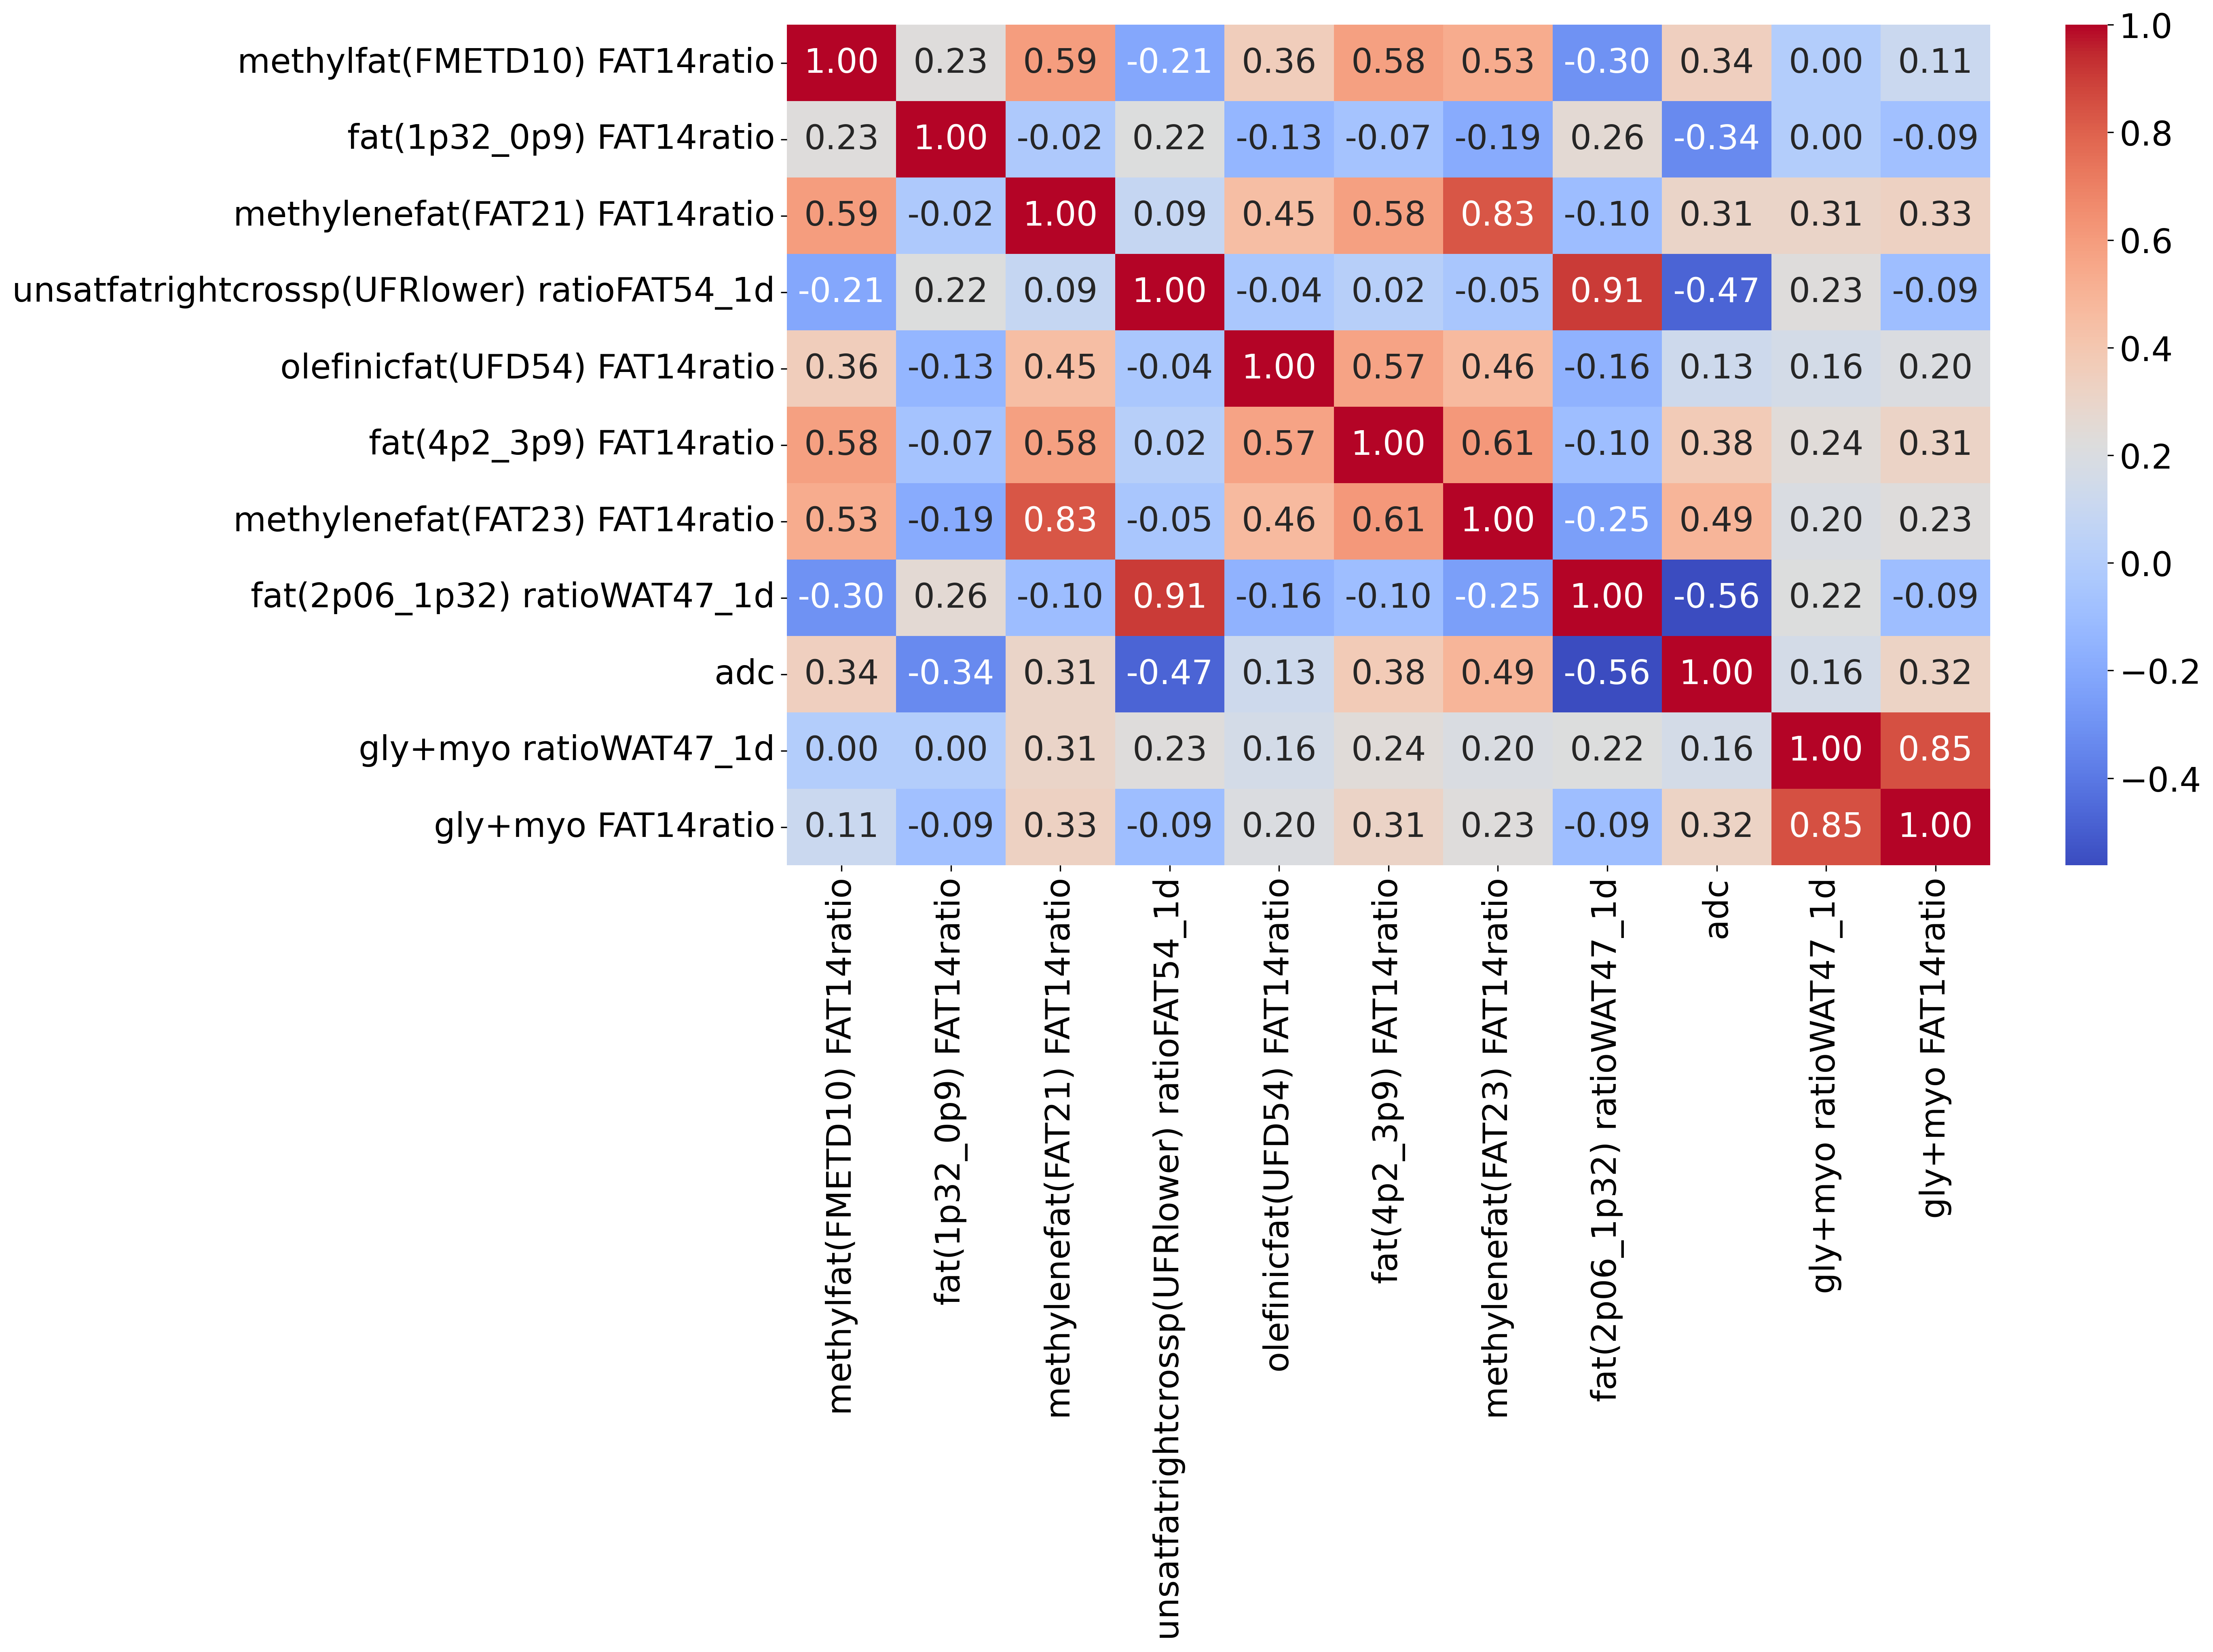

In [25]:
#search for features based on correlation
plt.figure(figsize=(16, 9), dpi=300)

selected_vars = train[combovar] #subset dataset
#selected_vars = selected_vars.rename(columns = re_dict) #rename column if not already
corr_matrix = selected_vars.corr(method='spearman')
retained_features = []
correlation_threshold = 0.6

cols = combovar
correlation_values = []
#iterate over and find features that are highly correlated
for feature in cols:
    correlation, _ = spearmanr(selected_vars[feature], y_train)
    correlation_values.append(correlation)
sorted_features = sorted(zip(cols, correlation_values), key=lambda x: x[1], reverse=False)
sorted_feature_list = [feature for feature, _ in sorted_features]
cols = sorted_feature_list
while len(cols) >0:
    #print(cols)
    col = cols[0]
    #for each feature, find any other features strongly correalted with it
    correlated_features = corr_matrix[abs(corr_matrix[col]) >= correlation_threshold].index.tolist() #which would incude itself, rho=1
    #retained the one that is the most correlated with the target
    max_corr_feature = max(correlated_features, key=lambda x: abs(spearmanr(selected_vars[x], y_train)[0]))
    retained_features.append(max_corr_feature)
    #get rid of everything already went thru
    cols = list(set(cols) - set(correlated_features))

# Remove duplicate features and retain the unique set
retained_features = list(set(retained_features))

# Filter the selected variables based on the retained features
selected_vars_filtered = selected_vars[retained_features]

# Print the retained features
print("Retained Features:", retained_features)
print("Number of reatined features: ",len(retained_features))
ax = sns.heatmap(selected_vars[retained_features].corr(method='spearman'),annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 20})
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.gcf().axes[1].tick_params(labelsize=20)
# Set the title and labels

rerun above if there is above 0.6 correlation value starting from the list of retained features

Retained Features: ['methylfat(FMETD10) FAT14ratio', 'fat(1p32_0p9) FAT14ratio', 'adc', 'olefinicfat(UFD54) FAT14ratio', 'methylenefat(FAT23) FAT14ratio', 'fat(2p06_1p32) ratioWAT47_1d', 'gly+myo FAT14ratio']
Number of reatined features:  7


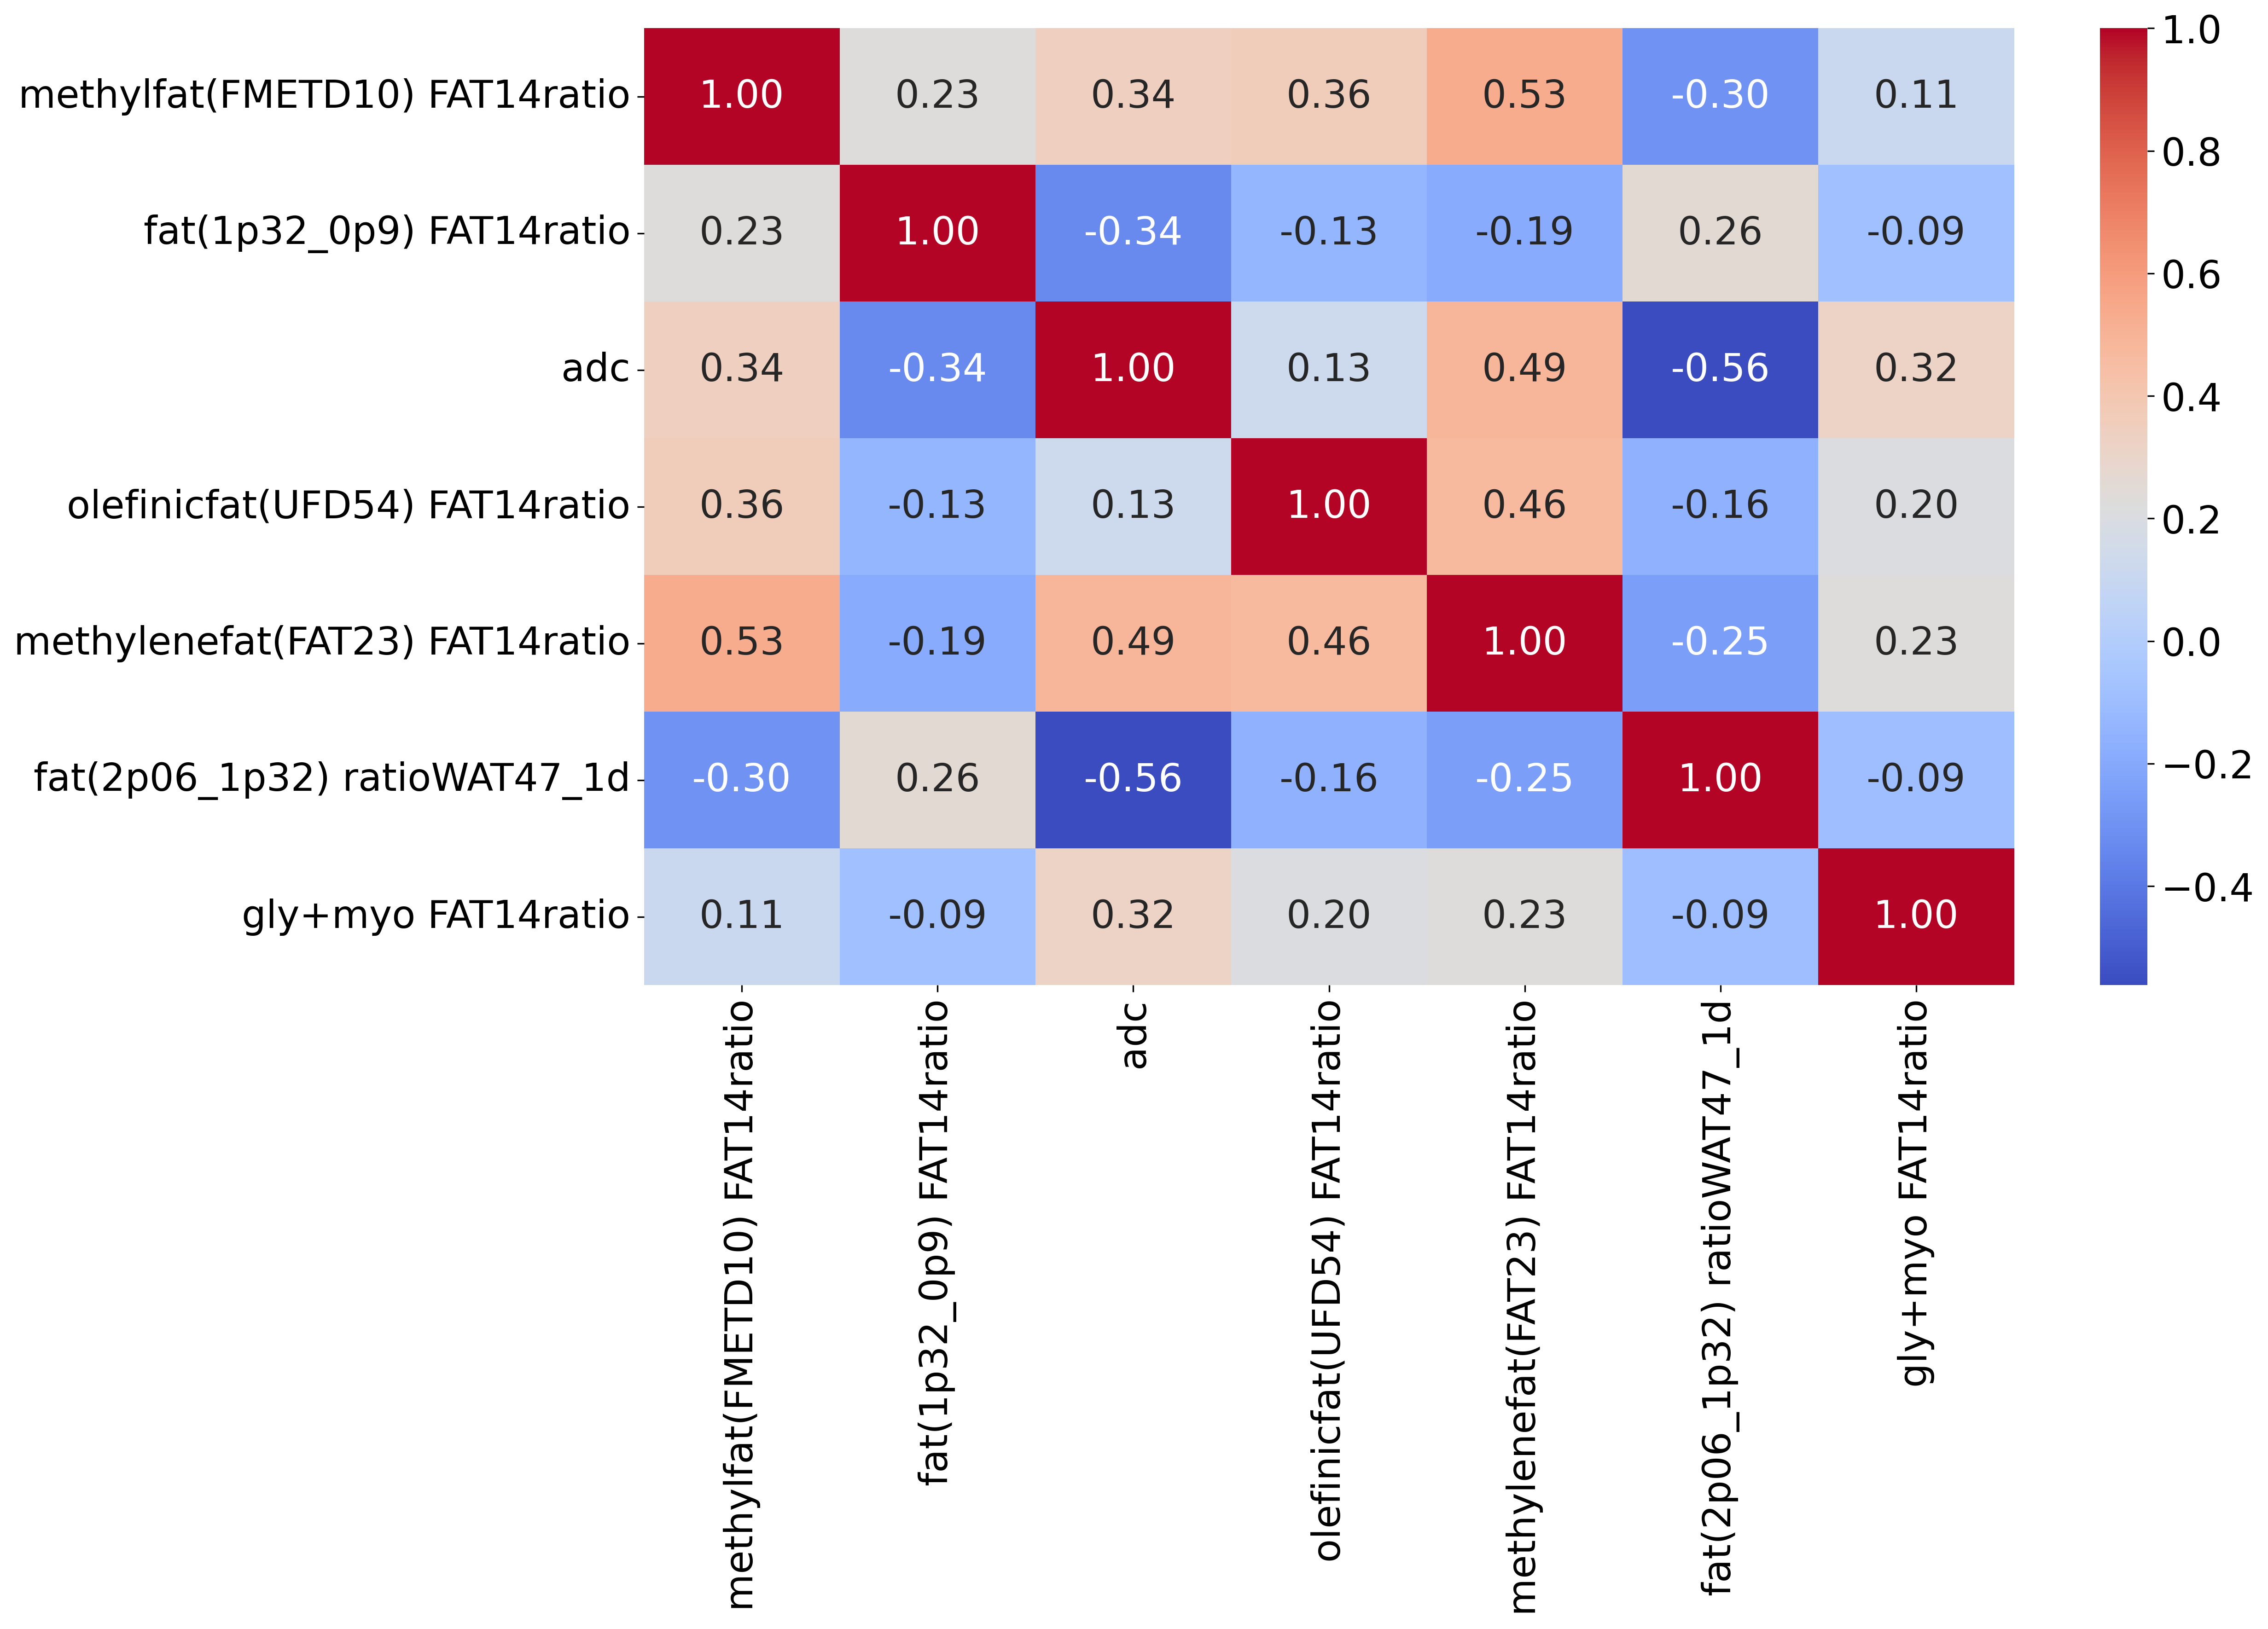

In [26]:
retained = ['methylfat(FMETD10) FAT14ratio', 'fat(1p32_0p9) FAT14ratio', 'methylenefat(FAT21) FAT14ratio', 'unsatfatrightcrossp(UFRlower) ratioFAT54_1d', 'olefinicfat(UFD54) FAT14ratio', 'fat(4p2_3p9) FAT14ratio', 'methylenefat(FAT23) FAT14ratio', 'fat(2p06_1p32) ratioWAT47_1d', 'adc', 'gly+myo ratioWAT47_1d', 'gly+myo FAT14ratio']

#search for features based on correlation
plt.figure(figsize=(16, 9), dpi=300)

selected_vars = train[retained] #subset dataset
#selected_vars = selected_vars.rename(columns = re_dict) #rename column if not already
corr_matrix = selected_vars.corr(method='spearman')
retained_features = []
correlation_threshold = 0.6

cols = retained
correlation_values = []
#iterate over and find features that are highly correlated
for feature in cols:
    correlation, _ = spearmanr(selected_vars[feature], y_train)
    correlation_values.append(correlation)
sorted_features = sorted(zip(cols, correlation_values), key=lambda x: x[1], reverse=False)
sorted_feature_list = [feature for feature, _ in sorted_features]
cols = sorted_feature_list
while len(cols) >0:
    #print(cols)
    col = cols[0]
    #for each feature, find any other features strongly correalted with it
    correlated_features = corr_matrix[abs(corr_matrix[col]) >= correlation_threshold].index.tolist() #which would incude itself, rho=1
    #retained the one that is the most correlated with the target
    max_corr_feature = max(correlated_features, key=lambda x: abs(spearmanr(selected_vars[x], y_train)[0]))
    retained_features.append(max_corr_feature)
    #get rid of everything already went thru
    cols = list(set(cols) - set(correlated_features))

# Remove duplicate features and retain the unique set
retained_features = list(set(retained_features))

# Filter the selected variables based on the retained features
selected_vars_filtered = selected_vars[retained_features]

# Print the retained features
print("Retained Features:", retained_features)
print("Number of reatined features: ",len(retained_features))
ax = sns.heatmap(selected_vars[retained_features].corr(method='spearman'),annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 20})
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.gcf().axes[1].tick_params(labelsize=20)
# Set the title and labels

In [27]:


# Calculate Spearman rank correlation and p-value for each variable and target
spear_results = []
for var in combovar:
    corr, p_value = spearmanr(train[var], y_train)
    spear_results.append({'Variable': var, 'Correlation': corr, 'P-value': p_value})

# Create a DataFrame from the results
results_df = pd.DataFrame(spear_results)
results_df[results_df["P-value"]>0.05] #print out insignificant


,Variable,Correlation,P-value


In [28]:


# Calculate Spearman rank correlation and p-value for each variable
spear_results = []
for var1 in combovar:
    for var2 in combovar:
        corr, p_value = spearmanr(train[var1], train[var2])
        var = str(set(sorted([var1,var2])))

        spear_results.append({'Variable': var, 'Correlation': corr, 'P-value': p_value})

# Create a DataFrame from the results
results_df = pd.DataFrame(spear_results)
print(results_df)


                                               Variable  Correlation  \
0                     {'methylfat(FMETD10) FAT14ratio'}     1.000000   
1      {'nws_wfratio', 'methylfat(FMETD10) FAT14ratio'}     0.296144   
2     {'unsatfatrightcrossp(UFRlower) ratioFAT54_1d'...    -0.212270   
3     {'methylenefat(FAT29) FAT14ratio', 'methylfat(...     0.219315   
4     {'olefinicfat(UFD54) FAT14ratio', 'methylfat(F...     0.358510   
...                                                 ...          ...   
1676  {'methylenefat(FAT21) ratioFAT54_1d', 'methylf...     0.952435   
1677  {'methylenefat(FAT21) ratioFAT54_1d', 'fat(3p9...     0.967372   
1678  {'methylenefat(FAT21) ratioFAT54_1d', 'gly+myo...    -0.045661   
1679  {'fat(4p2_3p9) ratioFAT14_1d', 'methylenefat(F...     0.949699   
1680              {'methylenefat(FAT21) ratioFAT54_1d'}     1.000000   

            P-value  
0      0.000000e+00  
1      1.625909e-08  
2      6.261933e-05  
3      3.490935e-05  
4      4.701879e-12  
...

In [29]:
#print out insignificantly low correlation
results_df[(results_df['P-value']>0.05) & (results_df['Correlation']<=0.6)].sort_values('Correlation').tail()

,Variable,Correlation,P-value
12,"{'triglycerylfatcrossp(TGFRupper) FAT14ratio',...",0.099712,0.062405
1149,"{'nws_wfratio', 'fat(1p64_2p36) FAT14ratio'}",0.101397,0.058085
69,"{'nws_wfratio', 'fat(1p64_2p36) FAT14ratio'}",0.101397,0.058085
867,"{'fat(2p36_1p64) ratioFAT54_1d', 'methylenegly...",0.104846,0.050010
267,"{'fat(2p36_1p64) ratioFAT54_1d', 'methylenegly...",0.104846,0.050010


final feature list

In [30]:
retained_features

['methylfat(FMETD10) FAT14ratio',
 'fat(1p32_0p9) FAT14ratio',
 'adc',
 'olefinicfat(UFD54) FAT14ratio',
 'methylenefat(FAT23) FAT14ratio',
 'fat(2p06_1p32) ratioWAT47_1d',
 'gly+myo FAT14ratio']